In [2]:
# we consider a least square problem, f(x) = (Ax-b)^2
import numpy as np
import numpy.linalg as la
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from math import sqrt


import warnings
warnings.filterwarnings("error")

In [3]:
np.random.seed(seed=42)
agent_num = 1

d=100
data_num = 100
# x_opt = np.ones((d))/d
x_opt = np.random.randn(d)+10
# x_local_opt = np.tile(x_opt,(agent_num, 1))
# x_local_opt = x_local_opt+  np.random.rand(agent_num, d)
# print(x_local_opt[:,0])
# P = ortho_group.rvs(d)
A = np.zeros((data_num, d))
b = np.zeros((data_num))

P = ortho_group.rvs(d)
eigv = (np.random.rand(d))
# eigv[0:5] = np.zeros(5)
A_temp = np.matmul( np.diag(eigv), P)
A = A_temp[0:data_num,:]
# A = np.matmul(np.transpose(P), np.matmul( np.diag(eigv), P))
# x_opt = np.random.rand(d)
# print(A.shape)

b = np.matmul( A, x_opt)
    
    
# filename = "d_1000_n_10"
# np.save(filename+"_A", A)
# np.save(filename+"_b", b)
# np.save(filename+"_x", x_opt)
# print(np.linalg.matrix_rank(np.matmul(np.transpose(A[1]), A[1])))


7.3802548959102925
8.09864370155945e-27


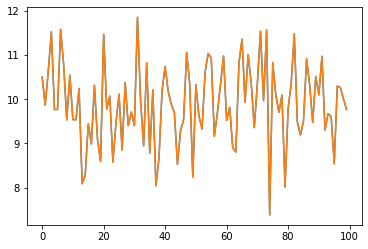

In [4]:
# gamma = np.load("gamma.npy")

# # we first try to calculate the real optimal x_star
# A_stack = np.reshape(A, (200,100))
# b_stack = np.reshape(b, (200))


# C = np.zeros((d,d-1))
# for i in range(d-1):
#     C[i,i] = 1
# C[d-1,:]=-1
# # print(C)np.log(loss_x_global_GD[0,500000])
# A_prime = np.matmul(A_stack, C)

# c_vector = np.zeros((d))
# c_vector[-1]=1
# # print(c_vector)
# b_prime = b_stack - np.matmul(A_stack, c_vector)


# pinv_A = np.linalg.pinv(A_prime)
# x_temp = np.matmul(pinv_A, b_prime)
# x_direct = np.zeros((d))
# x_direct[:d-1] = x_temp
# x_direct[d-1] = 1 - np.sum(x_temp)
# print(x_direct[0])
# error = np.matmul(A_stack, x_direct)-b_stack
# loss_star = np.matmul(np.transpose(error), error)
# print(np.sum(loss_star))
pinv_A = np.linalg.pinv(A)
x_direct = np.matmul(pinv_A, b)
# print(x_direct[0])
error = np.matmul(A, x_direct)-b
loss_star = np.matmul(np.transpose(error), error)
plt.plot(x_direct)
plt.plot(x_opt)
print(np.min(x_direct))
print(loss_star)


current learning rate: 0.209


reached, iteration num:
320312
learning rate: 0.209

best loss: 0.0


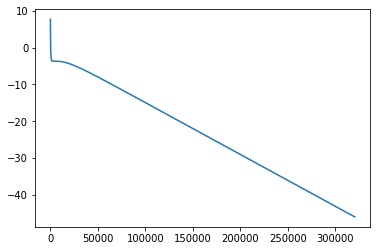

In [11]:
import time

x_0 = np.random.rand(d)

#first is gradient Descent
iter_num = 1000000
lr = 0.209
# time_int = 0.01
l_rates = np.array([0.207,0.208,0.209,0.211])
l_rates = np.array([0.209])
x_k = np.zeros((d))
x_k1 = np.zeros((d))

z_k = np.zeros((d))
z_k1 = np.zeros((d))
# x_k2 = np.zeros((agent_num,d))
y_k = np.zeros((d))
y_k1 = np.zeros((d))

loss_x_global = np.zeros(( iter_num))

x_k = np.copy(x_0)

# 
# z_k =  np.copy(x_k)

z_k =  np.log(x_k)+1
# 
for j, lr in enumerate(l_rates):
    
    print("current learning rate:", lr)
    x_k = np.zeros((d))
    x_k1 = np.zeros((d))

    z_k = np.zeros((d))
    z_k1 = np.zeros((d))
    # x_k2 = np.zeros((agent_num,d))
    y_k = np.zeros((d))
    y_k1 = np.zeros((d))

    loss_x_global = np.zeros(( iter_num))

    x_k = np.copy(x_0)

    # 
    # z_k =  np.copy(x_k)

    z_k =  np.log(x_k)+1
    for k in tqdm(range( iter_num)):

        gradient_k1 = np.matmul(np.transpose(A), (np.matmul(A, x_k)-b))
        z_k1 = z_k - (lr*gradient_k1)

        error = np.matmul(A, x_k)-b
        loss_x_global[k] = np.matmul(np.transpose(error), error)
        if((loss_x_global[k])< 1e-20):
            print("reached, iteration num:")
            print(k)
            print("learning rate:", lr)
            break

    #    change mirror method     
        x_k = np.exp(z_k1)/np.exp(1)
    #         print(np.max(x_k[i,:]))
    #         x_k[i,:] = np.exp(z_k1[i,:])/sum(np.exp(z_k1[i,:]))
    #     

        z_k = np.copy(z_k1)
        y_k = np.copy(y_k1)

    plt.plot(np.log(loss_x_global[1:]))

    print("best loss:", loss_x_global[-1])
#     error = np.matmul(A, x_k)-b
#     loss_x_global[k] = np.matmul(np.transpose(error), error)

# plt.plot(x_opt)
# plt.plot(x_k)
# print(loss_x_global[k])
loss_x_global_MD_1 = np.copy(loss_x_global)
    

In [7]:
import time

x_0 = np.random.rand(d)

#first is gradient Descent
iter_num = 1000000
# lr = 3050
# time_int = 0.01
l_rates = np.array([2700,2900,3000,3050,3100])
l_rates = np.array([3050])
x_k = np.zeros((d))
x_k1 = np.zeros((d))

z_k = np.zeros((d))
z_k1 = np.zeros((d))
# x_k2 = np.zeros((agent_num,d))
y_k = np.zeros((d))
y_k1 = np.zeros((d))

loss_x_global = np.zeros(( iter_num))

x_k = np.copy(x_0)

# 
# z_k =  np.copy(x_k)

# z_k =  np.log(x_k)+1
# 
for j, lr in enumerate(l_rates):
    
    print("current learning rate:", lr)
    x_k = np.zeros((d))
    x_k1 = np.zeros((d))

    z_k = np.zeros((d))
    z_k1 = np.zeros((d))
    # x_k2 = np.zeros((agent_num,d))
    y_k = np.zeros((d))
    y_k1 = np.zeros((d))

    loss_x_global = np.zeros(( iter_num))

    x_k = np.copy(x_0)

    # 
    # z_k =  np.copy(x_k)

    z_k =  np.exp(x_k)/np.exp(1)
#     z_k =  np.log(x_k)+1
    for k in tqdm(range( iter_num)):

        gradient_k1 = np.matmul(np.transpose(A), (np.matmul(A, x_k)-b))
        z_k1 = np.abs(z_k - (lr*gradient_k1))

        error = np.matmul(A, x_k)-b
        loss_x_global[k] = np.matmul(np.transpose(error), error)
        if((loss_x_global[k])< 1e-20):
            print("reached, iteration num:")
            print(k)
            print("learning rate:", lr)
            break

    #    change mirror method     
        x_k = np.log(z_k1)+1
#         x_k = np.exp(z_k1)/np.exp(1)
    #         print(np.max(x_k[i,:]))
    #         x_k[i,:] = np.exp(z_k1[i,:])/sum(np.exp(z_k1[i,:]))
    #     

        z_k = np.copy(z_k1)
        y_k = np.copy(y_k1)

    plt.plot(np.log(loss_x_global[1:]))

    print("best loss:", loss_x_global[-1])
#     error = np.matmul(A, x_k)-b
#     loss_x_global[k] = np.matmul(np.transpose(error), error)

# plt.plot(x_opt)
# plt.plot(x_k)
# print(loss_x_global[k])
loss_x_global_MD_2 = np.copy(loss_x_global)


current learning rate: 2.13


reached, iteration num:
284686
learning rate: 2.13

best loss: 0.0


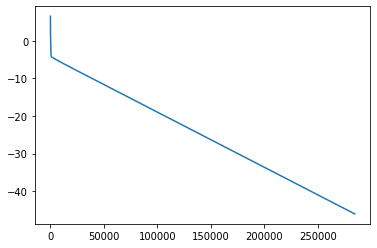

In [10]:
import time

x_0 = np.random.rand(d)

#first is gradient Descent
iter_num = 1000000
lr = 2.13
# time_int = 0.01
# l_rates = np.array([2.11,2.12,2.13,2.14])
l_rates = np.array([2.13])
x_k = np.zeros((d))
x_k1 = np.zeros((d))

z_k = np.zeros((d))
z_k1 = np.zeros((d))
# x_k2 = np.zeros((agent_num,d))
y_k = np.zeros((d))
y_k1 = np.zeros((d))

loss_x_global = np.zeros(( iter_num))

x_k = np.copy(x_0)

# 
z_k =  np.copy(x_k)

# z_k =  np.log(x_k)+1
# 
for j, lr in enumerate(l_rates):
    
    print("current learning rate:", lr)
    x_k = np.zeros((d))
    x_k1 = np.zeros((d))

    z_k = np.zeros((d))
    z_k1 = np.zeros((d))
    # x_k2 = np.zeros((agent_num,d))
    y_k = np.zeros((d))
    y_k1 = np.zeros((d))

    loss_x_global = np.zeros(( iter_num))

    x_k = np.copy(x_0)

    # 
    z_k =  np.copy(x_k)

#     z_k =  np.log(x_k)+1
    for k in tqdm(range( iter_num)):

        gradient_k1 = np.matmul(np.transpose(A), (np.matmul(A, x_k)-b))
        z_k1 = z_k - (lr*gradient_k1)

        error = np.matmul(A, x_k)-b
        loss_x_global[k] = np.matmul(np.transpose(error), error)
        if((loss_x_global[k])< 1e-20):
            print("reached, iteration num:")
            print(k)
            print("learning rate:", lr)
            break

    #    change mirror method     
#         x_k = np.exp(z_k1)/np.exp(1)
        x_k = np.copy(z_k1)
    #         print(np.max(x_k[i,:]))
    #         x_k[i,:] = np.exp(z_k1[i,:])/sum(np.exp(z_k1[i,:]))
    #     

        z_k = np.copy(z_k1)
        y_k = np.copy(y_k1)

    plt.plot(np.log(loss_x_global[1:]))

    print("best loss:", loss_x_global[-1])
#     error = np.matmul(A, x_k)-b
#     loss_x_global[k] = np.matmul(np.transpose(error), error)

# plt.plot(x_opt)
# plt.plot(x_k)
# print(loss_x_global[k])
loss_x_global_GD = np.copy(loss_x_global)

    

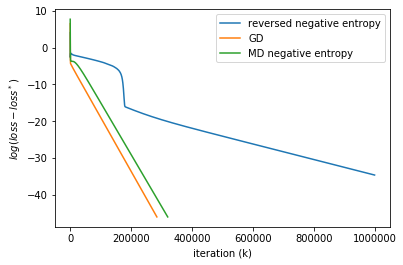

In [16]:
plt.plot(np.log(loss_x_global_MD_2[1:]))
plt.plot(np.log(loss_x_global_GD[1:]))
plt.plot(np.log(loss_x_global_MD_1[1:]))
plt.xlabel('iteration (k)')
plt.ylabel('$log(loss - loss^*)$')
plt.legend( ('reversed negative entropy','GD','MD negative entropy'),loc='upper right')

# plt.savefig("100k_simplex_log(local_loss-loss_star)")
plt.savefig("comparison_between_GD_MD")

In [30]:
import time

x_0 = np.random.rand(agent_num, d)

#M Descent
iter_num = 500000
lr = 1

time_ints = np.array([0.019])
# best is 0.019
# time_ints = np.array([0.5,0.6,0.7,0.8,0.9,1])
improvement = np.zeros(9)

for j, time_int in enumerate(time_ints):
    reach=0
    x_k = np.zeros((agent_num,d))
    x_k1 = np.zeros((agent_num,d))

    z_k = np.zeros((agent_num,d))
    z_k1 = np.zeros((agent_num,d))
    # x_k2 = np.zeros((agent_num,d))
    y_k = np.zeros((agent_num,d))
    y_k1 = np.zeros((agent_num,d))
    # y_k2 = np.zeros((agent_num,d))
    # x_accumulate = np.zeros((agent_num,d))
    # y_accumulate = np.zeros((agent_num,d))


    # z = np.zeros(d)
    # loss_z = np.zeros((iter_num))
    loss_x_global = np.zeros((agent_num, iter_num))
    # accu_x_record = np.zeros((iter_num))
    # accu_y_record = np.zeros((iter_num))
    x_record = np.zeros((iter_num))
    x_mean = np.zeros((iter_num))
    loss = np.zeros((agent_num, iter_num))

    # z = np.mean(x_0, axis = 0)
    # for i in  range(agent_num):

    #     x_k[i] = np.copy(x_0)
    x_k = np.copy(x_0)

    # 
    # z_k =  np.copy(x_k)

    z_k =  np.log(x_k)+1
    # 
    for k in tqdm(range( iter_num)):
        for i in range(agent_num):

            gradient_k1 = np.matmul(np.transpose(A[i]), (np.matmul(A[i], x_k[i,:])-b[i]))
            y_k1[i,:] = y_k[i,:] + time_int*(x_k[(i+1)%agent_num,:]+x_k[(i-1)%agent_num,:] - 2*x_k[i,:])
            z_k1[i,:] = z_k[i,:] - time_int*(lr*gradient_k1 - y_k[i,:] - (x_k[(i+1)%agent_num,:]+x_k[(i-1)%agent_num,:] - 2*x_k[i,:]))

#             error = np.matmul(A[i], x_k1[i,:])-b[i]
#             loss_GD[i, k] = np.matmul(np.transpose(error), error)

    #    change mirror method     
        for i in range(agent_num):
            x_k[i,:] = np.exp(z_k1[i,:])/np.exp(1)    #         print(np.max(x_k[i,:]))
    #         x_k[i,:] = np.exp(z_k1[i,:])/sum(np.exp(z_k1[i,:]))
    #     

        z_k = np.copy(z_k1)
        y_k = np.copy(y_k1)

    #     z = np.mean(x_k, axis = 0)
    #     print(z[0])
    #     for i in range(agent_num):
    #     error = np.matmul(A_stack, z)-b_stack
    #     loss_z[k] = np.matmul(np.transpose(error), error)
        temp_sum = 0
        x_bar = np.mean(x_k, axis=0)
        for agent in range(agent_num):
            temp_sum += np.linalg.norm(x_k[agent,:]-x_bar)
        x_record[k] = temp_sum/agent_num
        for i in range(agent_num):
    #         print(x_k[i,:])
    #         np.matmul(A_stack, )
            error = np.matmul(A_stack, x_k[i,:])-b_stack
            loss_x_global[i,k] = np.matmul(np.transpose(error), error)
            if((loss_x_global[i,k]-loss_star)< 1e-30):
                print("reached, iteration num:")
                print(k)
                print("time_int:", time_int)
                reach=1
                improvement[j] = k
                print(x_k[i,:])
                break
    #             time.sleep(3600)
        if reach==1:
            break
#     improvement[j] = np.log(loss_x_global_GD[0,500000-1]) - np.log(loss_x_global_GD[0,400000])


reached, iteration num:
183224
time_int: 0.019
[10.6069722  10.19253331 11.40227549 11.97237216 10.00932429  9.87165869
 11.69584584 10.81138986 10.99289059 10.69548005  9.55955815 10.97612689
  9.91730201  9.25233031  8.71886237  9.38970674  9.0757591  10.18604115
  9.10298737  8.95472892 11.92448726  9.41827761 11.04054938  8.7878703
  9.91518656 10.47380094  8.57666555 10.861291   10.26679674  8.34994341
 10.60295831 12.11529342  9.98924989 11.1878346  10.00441285  9.9150261
 10.91021512  8.72795802  7.95853602 11.47948145 11.44486785 11.59969955
 10.30266144  9.38341308  8.23335799  9.57114227 10.2075462  11.80185187
  9.67488512  8.66570027 10.50439858  9.37431742  9.5526845  11.98197384
 11.14580238 11.92849542  9.04585017  9.73882733 10.24046001 11.61740398
 10.78887329 11.20278819 10.19144979  9.57030351 10.71582222 11.1898164
 10.30512827 11.0776385  10.157191    9.84361596 10.18198839 13.30650858
 10.59463786 12.10595129  7.45875175 12.3668289  10.44965752 10.76812857
 10.942

In [74]:
import time
# change to reverse DGF
# x_0 = np.random.rand(agent_num, d)
x_0 = np.ones((agent_num, d))

#M Descent
iter_num = 500000
lr = 1000

time_ints = np.array([0.1,0.2,0.5,1,2,5,10,20])
time_ints = np.array([2])
# best is 0.016
# time_ints = np.array([0.5,0.6,0.7,0.8,0.9,1])
improvement = np.zeros(9)

for j, time_int in enumerate(time_ints):
    reach=0
    x_k = np.zeros((agent_num,d))
    x_k1 = np.zeros((agent_num,d))

    z_k = np.zeros((agent_num,d))
    z_k1 = np.zeros((agent_num,d))
    # x_k2 = np.zeros((agent_num,d))
    y_k = np.zeros((agent_num,d))
    y_k1 = np.zeros((agent_num,d))
    # y_k2 = np.zeros((agent_num,d))
    # x_accumulate = np.zeros((agent_num,d))
    # y_accumulate = np.zeros((agent_num,d))


    # z = np.zeros(d)
    # loss_z = np.zeros((iter_num))
    loss_x_global_MD_z = np.zeros((agent_num, iter_num))
    # accu_x_record = np.zeros((iter_num))
    # accu_y_record = np.zeros((iter_num))
    x_record = np.zeros((iter_num))
    x_mean = np.zeros((iter_num))
    loss_MD_z = np.zeros((agent_num, iter_num))

    # z = np.mean(x_0, axis = 0)
    # for i in  range(agent_num):

    #     x_k[i] = np.copy(x_0)
    x_k = np.copy(x_0)

    # 
    # z_k =  np.copy(x_k)

#     z_k =  np.log(x_k)+1
    z_k =  np.exp(x_k)/np.exp(1)
    # 
    for k in tqdm(range( iter_num)):
        for i in range(agent_num):

            gradient_k1 = np.matmul(np.transpose(A[i]), (np.matmul(A[i], x_k[i,:])-b[i]))
            y_k1[i,:] = y_k[i,:] + time_int*(x_k[(i+1)%agent_num,:]+x_k[(i-1)%agent_num,:] - 2*x_k[i,:])
            temp = time_int*(lr*gradient_k1 - y_k[i,:] - (x_k[(i+1)%agent_num,:]+x_k[(i-1)%agent_num,:] - 2*x_k[i,:]))
#             print(temp.shape)
#             print(z_k[i,:].shape)
            z_k1[i,:] = np.abs(z_k[i,:] - temp)

#             error = np.matmul(A[i], x_k1[i,:])-b[i]
#             loss_GD[i, k] = np.matmul(np.transpose(error), error)

    #    change mirror method     
        for i in range(agent_num):
#             x_k[i,:] = np.exp(z_k1[i,:])/np.exp(1)    #         print(np.max(x_k[i,:]))
            x_k[i,:] = np.log(z_k1[i,:])+1   #         print(np.max(x_k[i,:]))
    #         x_k[i,:] = np.exp(z_k1[i,:])/sum(np.exp(z_k1[i,:]))
    #     

        z_k = np.copy(z_k1)
        y_k = np.copy(y_k1)

    #     z = np.mean(x_k, axis = 0)
    #     print(z[0])
    #     for i in range(agent_num):
    #     error = np.matmul(A_stack, z)-b_stack
    #     loss_z[k] = np.matmul(np.transpose(error), error)
        temp_sum = 0
        x_bar = np.mean(x_k, axis=0)
        for agent in range(agent_num):
            temp_sum += np.linalg.norm(x_k[agent,:]-x_bar)
        x_record[k] = temp_sum/agent_num
        for i in range(agent_num):
    #         print(x_k[i,:])
    #         np.matmul(A_stack, )
            error = np.matmul(A_stack, x_k[i,:])-b_stack
            loss_x_global_MD_z[i,k] = np.matmul(np.transpose(error), error)
            if((loss_x_global_MD_z[i,k]-loss_star)< 1e-30):
                print("reached, iteration num:")
                print(k)
                print("time_int:", time_int)
                reach=1
                improvement[j] = k
                print(x_k[i,:])
                break
    #             time.sleep(3600)
        if reach==1:
            break
#     improvement[j] = np.log(loss_x_global_GD[0,500000-1]) - np.log(loss_x_global_GD[0,400000])


reached, iteration num:
357546
time_int: 2
[10.60697227 10.19253323 11.40227546 11.97237212 10.00932437  9.87165873
 11.69584583 10.81138991 10.9928906  10.69548003  9.55955806 10.97612685
  9.91730194  9.25233027  8.71886244  9.38970681  9.07575898 10.18604115
  9.10298744  8.95472895 11.92448728  9.41827761 11.04054935  8.78787023
  9.91518657 10.473801    8.57666558 10.86129102 10.26679672  8.34994342
 10.60295836 12.11529337  9.98924992 11.18783459 10.0044129   9.91502607
 10.91021521  8.72795805  7.95853598 11.47948153 11.44486784 11.59969955
 10.30266149  9.383413    8.23335785  9.57114227 10.20754617 11.8018519
  9.67488516  8.6657002  10.50439861  9.37431741  9.55268445 11.98197381
 11.1458024  11.92849546  9.04585009  9.73882716 10.24045997 11.61740404
 10.78887328 11.20278817 10.19144983  9.57030348 10.71582222 11.1898164
 10.30512833 11.07763849 10.15719107  9.84361602 10.18198841 13.30650864
 10.59463794 12.10595128  7.4587517  12.3668289  10.44965753 10.76812856
 10.942259

In [31]:
import time

x_0 = np.random.rand(agent_num, d)

#first is gradient Descent
iter_num = 500000
lr = 1

# time_ints = np.array([0.01,0.02,0.05,0.1,0.2,0.5,1,2,5])
# best is 0.6
time_ints = np.array([0.6])
improvement = np.zeros(9)

for j, time_int in enumerate(time_ints):
    reach=0
    x_k = np.zeros((agent_num,d))
    x_k1 = np.zeros((agent_num,d))

    z_k = np.zeros((agent_num,d))
    z_k1 = np.zeros((agent_num,d))
    # x_k2 = np.zeros((agent_num,d))
    y_k = np.zeros((agent_num,d))
    y_k1 = np.zeros((agent_num,d))
    # y_k2 = np.zeros((agent_num,d))
    # x_accumulate = np.zeros((agent_num,d))
    # y_accumulate = np.zeros((agent_num,d))


    # z = np.zeros(d)
    # loss_z = np.zeros((iter_num))
    loss_x_global_GD = np.zeros((agent_num, iter_num))
    # accu_x_record = np.zeros((iter_num))
    # accu_y_record = np.zeros((iter_num))
    x_record = np.zeros((iter_num))
    x_mean = np.zeros((iter_num))
    loss_GD = np.zeros((agent_num, iter_num))

    # z = np.mean(x_0, axis = 0)
    # for i in  range(agent_num):

    #     x_k[i] = np.copy(x_0)
    x_k = np.copy(x_0)

    # 
    # z_k =  np.copy(x_k)

    z_k =  np.copy(x_0)
    # 
    for k in tqdm(range( iter_num)):
        for i in range(agent_num):

            gradient_k1 = np.matmul(np.transpose(A[i]), (np.matmul(A[i], x_k[i,:])-b[i]))
            y_k1[i,:] = y_k[i,:] + time_int*(x_k[(i+1)%agent_num,:]+x_k[(i-1)%agent_num,:] - 2*x_k[i,:])
            z_k1[i,:] = z_k[i,:] - time_int*(lr*gradient_k1 - y_k[i,:] - (x_k[(i+1)%agent_num,:]+x_k[(i-1)%agent_num,:] - 2*x_k[i,:]))

#             error = np.matmul(A[i], x_k1[i,:])-b[i]
#             loss_GD[i, k] = np.matmul(np.transpose(error), error)

    #    change mirror method     
        for i in range(agent_num):
            x_k[i,:] = np.copy(z_k1[i,:])
    #         print(np.max(x_k[i,:]))
    #         x_k[i,:] = np.exp(z_k1[i,:])/sum(np.exp(z_k1[i,:]))
    #     

        z_k = np.copy(z_k1)
        y_k = np.copy(y_k1)

    #     z = np.mean(x_k, axis = 0)
    #     print(z[0])
    #     for i in range(agent_num):
    #     error = np.matmul(A_stack, z)-b_stack
    #     loss_z[k] = np.matmul(np.transpose(error), error)
        temp_sum = 0
        x_bar = np.mean(x_k, axis=0)
        for agent in range(agent_num):
            temp_sum += np.linalg.norm(x_k[agent,:]-x_bar)
        x_record[k] = temp_sum/agent_num
        for i in range(agent_num):
    #         print(x_k[i,:])
    #         np.matmul(A_stack, )
            error = np.matmul(A_stack, x_k[i,:])-b_stack
            loss_x_global_GD[i,k] = np.matmul(np.transpose(error), error)
            if((loss_x_global_GD[i,k]-loss_star)< 1e-30):
                print("reached, iteration num:")
                print(k)
                print("time_int:", time_int)
                reach=1
                improvement[j] = k
                print(x_k[i,:])
                break
    #             time.sleep(3600)
        if reach==1:
            break
#     improvement[j] = np.log(loss_x_global_GD[0,500000-1]) - np.log(loss_x_global_GD[0,400000])


reached, iteration num:
54864
time_int: 0.6
[10.60697221 10.1925333  11.40227549 11.97237216 10.00932429  9.8716587
 11.69584584 10.81138984 10.99289059 10.69548003  9.55955814 10.97612687
  9.91730202  9.2523303   8.71886239  9.38970674  9.0757591  10.18604114
  9.10298739  8.95472893 11.92448725  9.41827762 11.04054939  8.78787029
  9.91518656 10.47380095  8.57666556 10.86129101 10.26679673  8.34994342
 10.60295831 12.11529341  9.9892499  11.1878346  10.00441285  9.9150261
 10.91021512  8.72795803  7.95853602 11.47948144 11.44486785 11.59969955
 10.30266144  9.38341307  8.23335798  9.57114228 10.2075462  11.80185187
  9.67488513  8.66570026 10.50439859  9.37431743  9.5526845  11.98197385
 11.14580238 11.92849543  9.04585017  9.73882732 10.24046    11.61740399
 10.78887329 11.20278819 10.19144979  9.5703035  10.71582222 11.1898164
 10.30512828 11.07763851 10.15719101  9.84361597 10.1819884  13.30650859
 10.59463786 12.10595129  7.45875174 12.36682891 10.44965752 10.76812857
 10.942259

In [14]:
print(improvement)


[-2.80498991e-03 -8.16315920e-05 -1.07435300e-09 -8.32667268e-16
 -1.38777878e-16 -6.60582700e-15  0.00000000e+00  0.00000000e+00
  0.00000000e+00]


In [15]:
print(np.log(loss_x_global_GD[0,500000-1]))

    

-0.21401830580999973


In [1]:
# # This is comparison in GD

# import time

# x_0 = np.random.rand(agent_num, d)

# #first is gradient Descent
# iter_num = 1000000
# lr = 1
# time_int = 0.01

# x_k = np.zeros((agent_num,d))
# x_k1 = np.zeros((agent_num,d))

# z_k = np.zeros((agent_num,d))
# z_k1 = np.zeros((agent_num,d))
# # x_k2 = np.zeros((agent_num,d))
# y_k = np.zeros((agent_num,d))
# y_k1 = np.zeros((agent_num,d))
# # y_k2 = np.zeros((agent_num,d))
# # x_accumulate = np.zeros((agent_num,d))
# # y_accumulate = np.zeros((agent_num,d))


# # z = np.zeros(d)
# # loss_z = np.zeros((iter_num))
# loss_x_global_GD = np.zeros((agent_num, iter_num))
# # accu_x_record = np.zeros((iter_num))
# # accu_y_record = np.zeros((iter_num))
# x_record = np.zeros((iter_num))
# x_mean = np.zeros((iter_num))
# loss_GD = np.zeros((agent_num, iter_num))

# # z = np.mean(x_0, axis = 0)
# # for i in  range(agent_num):

# #     x_k[i] = np.copy(x_0)
# x_k = np.copy(x_0)

# # 
# # z_k =  np.copy(x_k)

# # z_k =  np.log(x_k)+1
# # 
# for k in tqdm(range( iter_num)):
#     for i in range(agent_num):

#         gradient_k1 = np.matmul(np.transpose(A[i]), (np.matmul(A[i], x_k[i,:])-b[i]))
#         y_k1[i,:] = y_k[i,:] + time_int*(x_k[(i+1)%agent_num,:]+x_k[(i-1)%agent_num,:] - 2*x_k[i,:])
# #         x_k1[i,:] = x_k[i,:] - time_int*(lr*gradient_k1 )
#         x_k1[i,:] = x_k[i,:] - time_int*(lr*gradient_k1 - y_k[i,:] - (x_k[(i+1)%agent_num,:]+x_k[(i-1)%agent_num,:] - 2*x_k[i,:]))
#         error = np.matmul(A[i], x_k1[i,:])-b[i]
#         loss_GD[i, k] = np.matmul(np.transpose(error), error)
        
# #    change mirror method     
# #     for i in range(agent_num):
# #         x_k[i,:] = np.exp(z_k1[i,:])/np.exp(1)
# #         print(np.max(x_k[i,:]))
# #         x_k[i,:] = np.exp(z_k1[i,:])/sum(np.exp(z_k1[i,:]))
# #     
    
#     x_k = np.copy(x_k1)
#     y_k = np.copy(y_k1)

# #     z = np.mean(x_k, axis = 0)
# #     print(z[0])
# #     for i in range(agent_num):
# #     error = np.matmul(A_stack, z)-b_stack
# #     loss_z[k] = np.matmul(np.transpose(error), error)
#     temp_sum = 0
#     x_bar = np.mean(x_k, axis=0)
#     for agent in range(agent_num):
#         temp_sum += np.linalg.norm(x_k[agent,:]-x_bar)
#     x_record[k] = temp_sum/agent_num
#     for i in range(agent_num):
# #         print(x_k[i,:])
# #         np.matmul(A_stack, )
#         error = np.matmul(A_stack, x_k[i,:])-b_stack
#         loss_x_global_GD[i,k] = np.matmul(np.transpose(error), error)
# #         if((loss_x_global[i,k]-loss_star)< 0.01):
# #             print("reached")
# #             reach=0
# #             time.sleep(3600)



    

In [27]:
# plt.plot(x_record, label='x value at agent 1')
# # plt.plot(x_mean, label='x value of global average')
# # plt.scatter(accu_x_record[1:])
# # plt.plot(gamma[1:20000])
# y_range = 0.5
# plt.ylim((-y_range,y_range))

# plt.xlabel('iteration (k)')
# plt.ylabel('$x - x^*$')
# # ax.annotate('', xy=(0.99, 0), ha='left', va='top', xycoords='axes fraction', fontsize=8)
# plt.title("Integral Feedback")

# plt.legend(loc='upper right')

# # print(accu_x_record[-1])x_k[i,:]
# # plt.xlabel("x_tilde value")
# # plt.savefig("consensus_proposed")
# # print(gamma[100000])

In [23]:
# plt.plot(x_record[1000000:])
# plt.plot(gamma[1:20000])
# plt.ylim((-5e10,5000000))
# print(x_record[-1])
# plt.xlabel("local x value")

# plt.savefig("non_accel_EXTRA x_record 5m_it over_k")

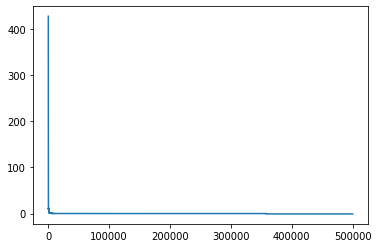

In [75]:
# loss_z_k2 = (loss_z-loss_star)*range(iter_num)*range(iter_num)
# loss_z_k1 = (loss_z-loss_star)*range(iter_num)
plt.plot(loss_x_global_MD_z[0,:]-loss_star)
# plt.ylim((-0.01,0.05))
# print(loss_z_k2[1:].min())
# print((loss_z*range(iter_num))[-1])
# plt.xlabel("(loss-loss*)xk^2")
# plt.savefig("non_accel_EXTRA (loss-loss_star)k 5m_it over_k")
# loss_star_global
# plt.savefig("100k_simplex_loss")

Text(0, 0.5, '$log(loss - loss^*)$')

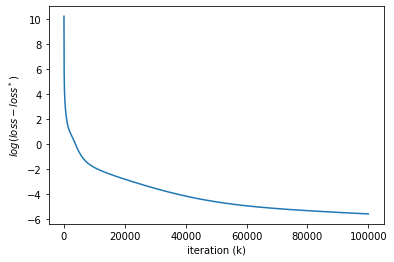

In [37]:
# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# ## for Palatino and other serif fonts use:
# #rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
    
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)*range(iter_num)
# loss_x = (loss_x_global-loss_star)
#     loss_x_k2 = (loss_x_global[i,:])*range(iter_num)*range(iter_num)
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)
plt.plot(np.log(loss_x_global-loss_star))
# loss_x2_k2 = (loss[1,:]-loss_star)*range(iter_num)*range(iter_num)
plt.xlabel('iteration (k)')
plt.ylabel('$log(loss - loss^*)$')

# plt.savefig("100k_simplex_log(local_loss-loss_star)")

# plt.plot(loss_x2_k2[1:])
# plt.ylim((0,1))
# print(loss_x_k2[1:].min())
# print(loss_z*range(30000)[-1])
# plt.xlabel("(loss-loss*)xk^2")


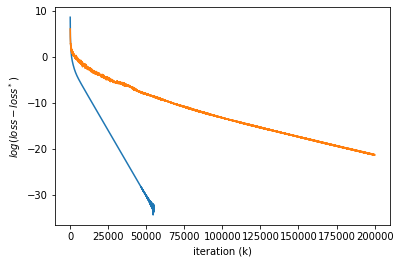

In [77]:
# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# ## for Palatino and other serif fonts use:
# #rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
iter_range = 200000
for i in range(1):
    
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)*range(iter_num)
    loss_x1 = (loss_x_global_GD[i,:]-loss_star)
    loss_x = (loss_x_global[i,:]-loss_star)
    loss_x_z = (loss_x_global_MD_z[i,:]-loss_star)
    
#     loss_x_k2 = (loss_x_global[i,:])*range(iter_num)*range(iter_num)
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)
    plt.plot(np.log(loss_x1[1:iter_range]))
#     plt.plot(np.log(loss_x[1:iter_range]))
    plt.plot(np.log(loss_x_z[1:iter_range]))
# loss_x2_k2 = (loss[1,:]-loss_star)*range(iter_num)*range(iter_num)
plt.xlabel('iteration (k)')
plt.ylabel('$log(loss - loss^*)$')

# plt.savefig("100k_simplex_log(local_loss-loss_star)")
plt.savefig("comparison_between_GD_MD_and_modified_y")

# plt.plot(loss_x2_k2[1:])
# plt.ylim((0,1))
# print(loss_x_k2[1:].min())
# print(loss_z*range(30000)[-1])
# plt.xlabel("(loss-loss*)xk^2")


In [35]:
# np.save("100d_simplex_1m_loss", loss_x_global)
# np.save("100d_simplex_1m_loss_star", loss_star)
np.save("100d_simplex_1m_x_minus_bar", x_record)
# np.save(outfile, x)